# 여행객 데이터 Cleansing

# 1. `tn_traveller_master_여행객 Master_E.csv` (가장 중심이 되는 파일)

이 파일은 여행객의 '정체성'을 담고 있으므로, 대부분의 정보를 활용합니다.

* **선택할 핵심 컬럼:**
    * `TRAVELER_ID`: **(필수)** 모든 데이터 병합의 기준이 되는 기본 키입니다.
    * **[인구통계]** `GENDER`, `AGE_GRP`, `MARR_STTS` (혼인상태), `FAMILY_MEMB` (가족 수), `JOB_NM` (직업), `INCOME` (개인소득), `HOUSE_INCOME` (가구소득)
        * **이유:** 페르소나를 정의하는 가장 기본적인 골격입니다. (예: 20대 미혼 여성, 40대 기혼 직장인 등)
    * **[여행 성향]** `TRAVEL_STYL_1` ~ `TRAVEL_STYL_8`
        * **이유:** 여행객의 선호도를 직접적으로 보여주는 매우 중요한 정보입니다. "어떤 스타일의 여행을 선호하는가?"를 나타냅니다.
    * **[여행 동기]** `TRAVEL_MOTIVE_1`, `TRAVEL_MOTIVE_2`, `TRAVEL_MOTIVE_3`
        * **이유:** "왜 여행을 떠나는가?"에 대한 정보로, 페르소나의 내적 동기를 파악하는 데 결정적입니다. (예: 휴식, 레저, 경험 등)
    * **[동반자 정보]** `TRAVEL_STATUS_ACCOMPANY` (동반 현황), `TRAVEL_COMPANIONS_NUM` (동반자 수)
        * **이유:** '나홀로', '커플', '자녀 동반' 등 페르소나를 구분하는 핵심적인 행동 특성입니다.

* **후순위 또는 제외 고려 컬럼:**
    * `RESIDENCE_SGG_CD` (거주지 시군구 코드): 너무 세분화되어 있어 군집화에 노이즈가 될 수 있습니다. '수도권/비수도권' 정도로 크게 묶어서 가공한다면 유용할 수 있습니다.
    * `EDU_NM`, `EDU_FNSH_SE` (학력 정보): 여행 스타일과의 직접적인 연관성이 다른 변수보다 낮을 수 있어 초기 분석에서는 제외를 고려할 수 있습니다.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rc('font', family='Malgun Gothic')  

# 음수 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [21]:
df = pd.read_csv('./data/tn_traveller_master_여행객 Master_E.csv')

print(df.shape) # (2560, 36)
df.head()

(2560, 36)


,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,e004720,41,여,60,4,1.0,3,3,11,NaN,...,5,5,경기도,서울,2인 가족 여행,2023-07-16~2023-07-16,2,6.0,NaN,1
1,e000914,30,여,20,6,1.0,1,1,3,NaN,...,4,1,대전광역시,서울,나홀로 여행,2023-06-03~2023-06-03,1,7.0,10.0,0
2,e003564,41,여,30,7,1.0,2,4,2,NaN,...,1,7,경기도,경기,자녀 동반 여행,2023-06-24~2023-06-24,8,3.0,7.0,3
3,e000396,41,여,30,6,1.0,2,2,2,NaN,...,1,6,경기도,인천,2인 가족 여행,2023-05-20~2023-05-21,9,1.0,7.0,1
4,e001890,11,남,20,6,1.0,1,4,3,NaN,...,5,6,서울특별시,경기,2인 여행(가족 외),2023-06-04~2023-06-04,3,1.0,5.0,1


In [22]:
df.info()
# EDU_FNSH_SE(최종학력이수여부), JOB_ETC(직업_기타), HOUSE_INCOME(가구소득), TRAVEL_MOTIVE_3(세부여행동기)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                2560 non-null   object 
 1   RESIDENCE_SGG_CD           2560 non-null   int64  
 2   GENDER                     2560 non-null   object 
 3   AGE_GRP                    2560 non-null   int64  
 4   EDU_NM                     2560 non-null   int64  
 5   EDU_FNSH_SE                2558 non-null   float64
 6   MARR_STTS                  2560 non-null   int64  
 7   FAMILY_MEMB                2560 non-null   int64  
 8   JOB_NM                     2560 non-null   int64  
 9   JOB_ETC                    0 non-null      float64
 10  INCOME                     2560 non-null   int64  
 11  HOUSE_INCOME               2004 non-null   float64
 12  TRAVEL_TERM                2560 non-null   int64  
 13  TRAVEL_NUM                 2560 non-null   int64

In [23]:
print(df["EDU_FNSH_SE"].unique())

[ 1.  3.  2.  5.  4. nan]


### 결측치 처리

In [24]:
# JOB_ETC 삭제
if "JOB_ETC" in df.columns:
    df = df.drop(columns=["JOB_ETC"])

# EDU_FNSH_SE 모두 1.0이므로 삭제
df = df.drop(columns=["EDU_FNSH_SE"])

# HOUSE_INCOME → 중앙값 대체
df["HOUSE_INCOME"] = df["HOUSE_INCOME"].fillna(df["HOUSE_INCOME"].median())

# TRAVEL_MOTIVE_2,3 → 0 대체
for col in ["TRAVEL_MOTIVE_2", "TRAVEL_MOTIVE_3"]:
    df[col] = df[col].fillna(0)

### 이상치 처리

In [25]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [26]:
df

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,MARR_STTS,FAMILY_MEMB,JOB_NM,INCOME,HOUSE_INCOME,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
1,e000914,30,여,20,6,1,1,3,4,7.0,...,4,1,대전광역시,서울,나홀로 여행,2023-06-03~2023-06-03,1,7.0,10.0,0
2,e003564,41,여,30,7,2,4,2,7,12.0,...,1,7,경기도,경기,자녀 동반 여행,2023-06-24~2023-06-24,8,3.0,7.0,3
3,e000396,41,여,30,6,2,2,2,2,5.0,...,1,6,경기도,인천,2인 가족 여행,2023-05-20~2023-05-21,9,1.0,7.0,1
4,e001890,11,남,20,6,1,4,3,5,9.0,...,5,6,서울특별시,경기,2인 여행(가족 외),2023-06-04~2023-06-04,3,1.0,5.0,1
7,e000782,41,남,50,7,2,3,2,5,9.0,...,1,2,경기도,서울,3인 이상 여행(가족 외),2023-05-27~2023-05-27,5,3.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,e008089,11,남,40,6,2,4,4,4,6.0,...,2,3,서울특별시,경기,2인 가족 여행,2023-08-22~2023-08-22,3,7.0,1.0,1
2553,e000962,28,여,30,5,2,3,11,1,7.0,...,4,4,인천광역시,서울,자녀 동반 여행,2023-06-03~2023-06-03,2,1.0,0.0,2
2554,e002610,41,남,30,6,2,4,2,5,7.0,...,7,2,경기도,경기,자녀 동반 여행,2023-06-30~2023-07-01,2,8.0,3.0,3
2557,e003297,41,남,20,5,1,4,8,4,12.0,...,1,7,경기도,서울,나홀로 여행,2023-06-18~2023-06-18,1,8.0,7.0,0


### 시각화

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4488\4268209679.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accompany_counts.index, y=accompany_counts.values, palette="viridis")


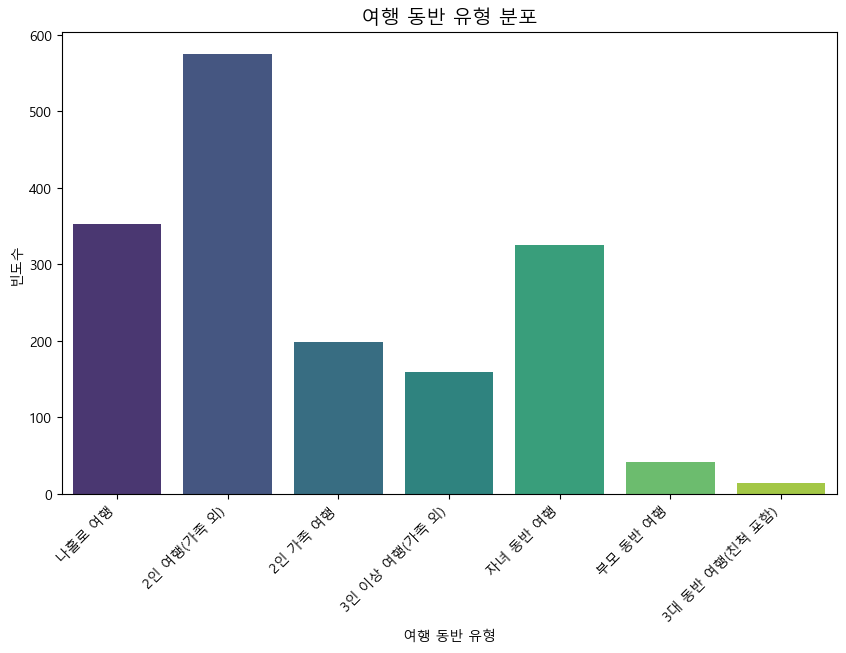

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 빈도수 계산
accompany_counts = df["TRAVEL_STATUS_ACCOMPANY"].value_counts()

order = ["나홀로 여행", 
         "2인 여행(가족 외)", 
         "2인 가족 여행", 
         "3인 이상 여행(가족 외)", 
         "자녀 동반 여행", 
         "부모 동반 여행", 
         "3대 동반 여행(친척 포함)"]

accompany_counts = accompany_counts.reindex(order)

plt.figure(figsize=(10,6))
sns.barplot(x=accompany_counts.index, y=accompany_counts.values, palette="viridis")

plt.title("여행 동반 유형 분포", fontsize=14)
plt.xlabel("여행 동반 유형")
plt.ylabel("빈도수")
plt.xticks(rotation=45, ha="right")
plt.show()


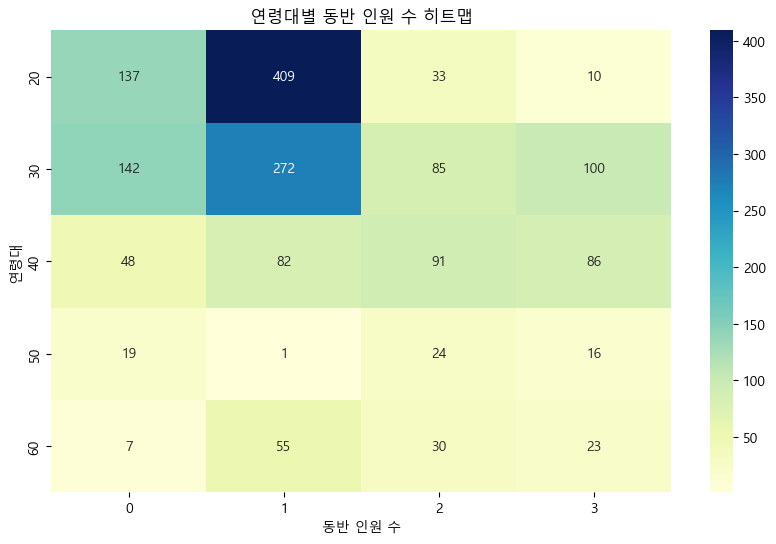

In [28]:
# 동반 인원 수
companions_age = pd.crosstab(df["AGE_GRP"], df["TRAVEL_COMPANIONS_NUM"])
plt.figure(figsize=(10,6))
sns.heatmap(companions_age, cmap="YlGnBu", annot=True, fmt="d")
plt.title("연령대별 동반 인원 수 히트맵")
plt.xlabel("동반 인원 수")
plt.ylabel("연령대")
plt.show()

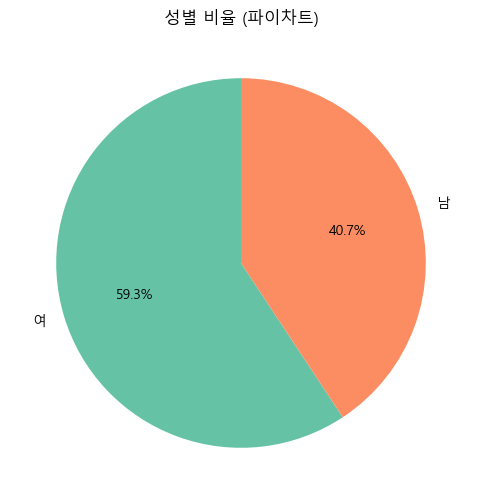

In [29]:
# 성별 분포
gender_counts = df["GENDER"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.1f%%", 
        startangle=90, colors=sns.color_palette("Set2"))
plt.title("성별 비율 (파이차트)")
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4488\144876152.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["AGE_GRP"], shade=True, color="blue")


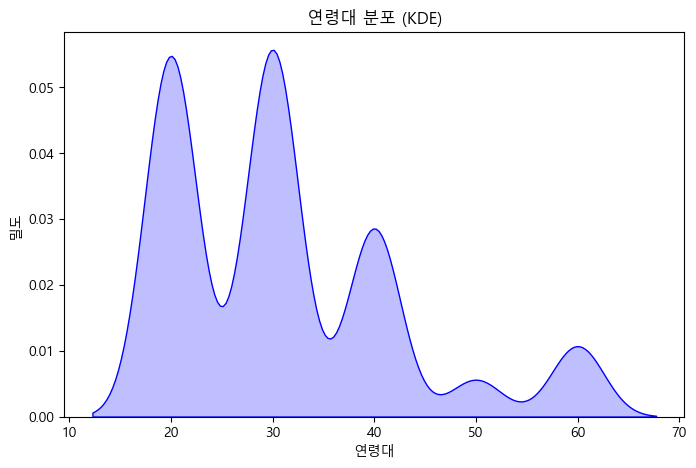

In [30]:
# 연령대 분포
plt.figure(figsize=(8,5))
sns.kdeplot(df["AGE_GRP"], shade=True, color="blue")
plt.title("연령대 분포 (KDE)")
plt.xlabel("연령대")
plt.ylabel("밀도")
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4488\1347907084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_sums.index, y=style_sums.values, palette="viridis")


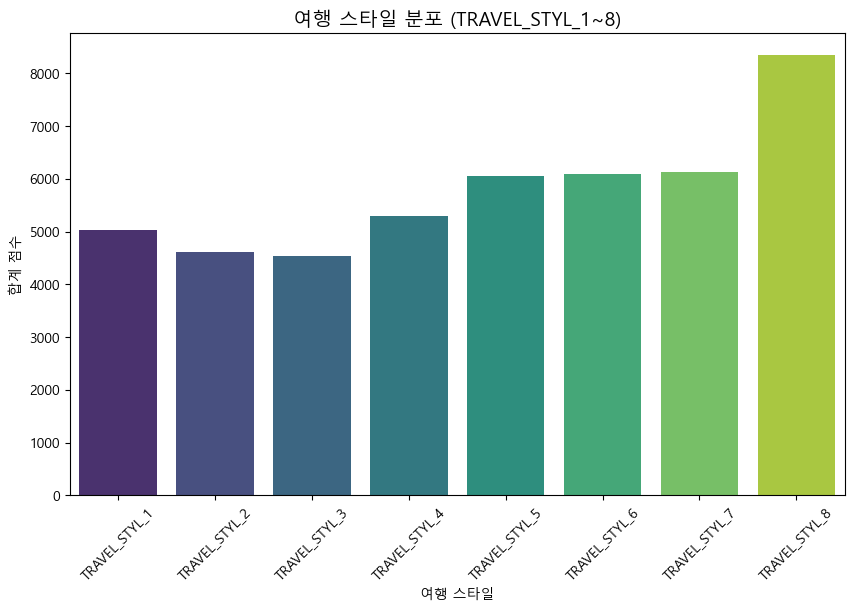

In [31]:
style_cols = [f"TRAVEL_STYL_{i}" for i in range(1, 9)]
style_sums = df[style_cols].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=style_sums.index, y=style_sums.values, palette="viridis")

plt.title("여행 스타일 분포 (TRAVEL_STYL_1~8)", fontsize=14)
plt.xlabel("여행 스타일")
plt.ylabel("합계 점수")
plt.xticks(rotation=45)
plt.show()